In [2]:
import zarr
import xarray as xr
import matplotlib.pyplot as plt
import gzip
import pickle
import numpy as np
from scipy import interpolate

def interpol1d(X, p):
    
    h,lt,ln=np.shape(p)
    out=np.zeros((len(p_std),lt,ln))
    
    for i in range(lt):
        for j in range(ln):
            f = interpolate.interp1d(p[:,i,j], X[:,i,j])
            out[:,i,j]=f(p_std)
            
    return out

In [8]:
import numpy as np
import xarray as xr
from eofs.xarray import Eof

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index= pickle.load(f)
    
int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])
    
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000
# with gzip.open('/home/scratch/Abel_data/rey_datv1', 'rb') as f:
#     convfh,convfh1,convfh2,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_datv4', 'rb') as f:
    convf,convv=pickle.load(f)

convt=(np.array(convf)+np.array(convv))/2000
# convt=np.array(convfv)+np.array(convfh1)+np.array(convfh2)+np.array(convfh)
# convt=np.array(convf)
len_arr=[0]
val=[]
for e in range(len(convt)):
    if (int_list[e]>=cut[0]  and int_list[e]<=cut[5]):
        len_arr.append(len(convt[e]))
        for i in convt[e]:
            val.append(i)

val=np.array(val)[:,:34]
# plt.plot(val[:5],p_std)
# plt.gca().invert_yaxis()
print(val.shape)

data_xr = xr.DataArray(val, dims=["time", "y"])
solver=Eof(data_xr)

eof1 = solver.eofs(neofs=2, eofscaling=2)
eof2 = solver.eofsAsCorrelation(neofs=2)
pc1 = solver.pcs(npcs=2, pcscaling=1)
var= solver.varianceFraction()
print(var.values[:])
print(eof1)
print(pc1)
print(solver.eigenvalues())

(7358, 34)
[8.16281440e-01 9.79840656e-02 4.20312934e-02 2.42251491e-02
 7.41626434e-03 4.99788506e-03 2.53105276e-03 1.32004045e-03
 9.96810891e-04 5.53036976e-04 2.84791299e-04 2.79502343e-04
 2.32892261e-04 1.86593727e-04 1.64329425e-04 1.08913866e-04
 8.55036749e-05 6.89215074e-05 5.43220647e-05 4.06308519e-05
 3.69588578e-05 3.01066243e-05 1.74323835e-05 1.52142557e-05
 1.38028286e-05 1.19965533e-05 1.00362482e-05 8.95197136e-06
 5.33270387e-06 3.02367816e-06 2.25121992e-06 7.08995874e-07
 6.26011404e-07 1.17810620e-07]
<xarray.DataArray 'eofs' (mode: 2, y: 34)>
array([[-6.26310854e+14, -2.96853103e+14, -2.99903513e+14,
        -3.01173912e+14, -3.00827735e+14, -2.98410839e+14,
        -2.92448260e+14, -2.84494093e+14, -2.70461055e+14,
        -2.59430901e+14, -2.49696540e+14, -2.42234071e+14,
        -2.33970267e+14, -2.31923097e+14, -2.25792240e+14,
        -2.17081652e+14, -2.05143567e+14, -1.98872648e+14,
        -1.90638600e+14, -1.82557516e+14, -1.81825426e+14,
        -1.76

/tmp/ipykernel_3751733/4268977675.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  convt=(np.array(convf)+np.array(convv))/2000


<IPython.core.display.Javascript object>


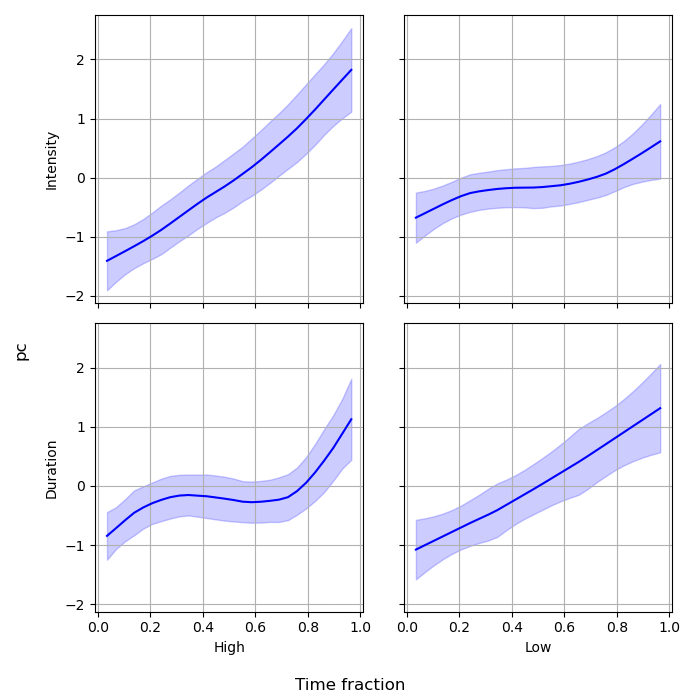

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
len_cum=np.cumsum(len_arr)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.set_size_inches(7, 7)

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index= pickle.load(f)

int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
xx=[]
yy=[]

cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])
        
for i in range(len(len_cum)-1):
    if (int_list[i]>=cut[4]  and int_list[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(pc1[len_cum[i]:len_cum[i+1],0])))
        yy.append(pc1[len_cum[i]:len_cum[i+1],0])
        
#     plt.scatter(np.linspace(0,1,len(pc1[len_cum[i]:len_cum[i+1],0])),pc1[len_cum[i]:len_cum[i+1],0])
# plt.plot(eof1[0,:],p_std)
# plt.gca().invert_yaxis()

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))
        
    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][0].plot(x_arr,mean_arr, color='blue')
ax[0][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2,color='blue')
# ax[0][0].set_title('High intensity')
ax[0][0].set_ylabel('Intensity')
ax[0][0].grid()

##############################################################################################################

int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
xx=[]
yy=[]

cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])
        
for i in range(len(len_cum)-1):
    if (int_list[i]>=cut[0]  and int_list[i]<=cut[1]):
        xx.append(np.linspace(0,1,len(pc1[len_cum[i]:len_cum[i+1],0])))
        yy.append(pc1[len_cum[i]:len_cum[i+1],0])
        
#     plt.scatter(np.linspace(0,1,len(pc1[len_cum[i]:len_cum[i+1],0])),pc1[len_cum[i]:len_cum[i+1],0])
# plt.plot(eof1[0,:],p_std)
# plt.gca().invert_yaxis()

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))
        
    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[0][1].plot(x_arr,mean_arr, color='blue')
ax[0][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2,color='blue')
# ax[0][1].set_title('Low intensity')
ax[0][1].grid()

###########################################################################################################

int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
xx=[]
yy=[]

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])
        
for i in range(len(len_cum)-1):
    if (dur_list[i]>=cut[4]  and dur_list[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(pc1[len_cum[i]:len_cum[i+1],0])))
        yy.append(pc1[len_cum[i]:len_cum[i+1],0])
        
#     plt.scatter(np.linspace(0,1,len(pc1[len_cum[i]:len_cum[i+1],0])),pc1[len_cum[i]:len_cum[i+1],0])
# plt.plot(eof1[0,:],p_std)
# plt.gca().invert_yaxis()

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))
        
    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][0].plot(x_arr,mean_arr, color='blue')
ax[1][0].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2,color='blue')
# ax[1][0].set_title('High duration')
ax[1][0].set_xlabel('High')
ax[1][0].set_ylabel('Duration')
ax[1][0].grid()

############################################################################################################

int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
xx=[]
yy=[]

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])
        
for i in range(len(len_cum)-1):
    if (dur_list[i]>=cut[0]  and dur_list[i]<=cut[1]):
        xx.append(np.linspace(0,1,len(pc1[len_cum[i]:len_cum[i+1],0])))
        yy.append(pc1[len_cum[i]:len_cum[i+1],0])
        
#     plt.scatter(np.linspace(0,1,len(pc1[len_cum[i]:len_cum[i+1],0])),pc1[len_cum[i]:len_cum[i+1],0])
# plt.plot(eof1[0,:],p_std)
# plt.gca().invert_yaxis()

xx_arr=np.linspace(0,1,30)
val_arr=[]
mean_arr=[];std_arr=[];x_arr=[]

for e in xx_arr:
    for i in range(len(xx)):
        if len(xx[i])>1:
            f = interpolate.interp1d(xx[i], yy[i])
            if e>xx[i][0] and xx[i][-1]>e:
                val_arr.append(f(e))
        
    if len(val_arr)>0:
        x_arr.append(e)
        mean_arr.append(np.mean(val_arr))
        std_arr.append(np.std(val_arr))
    val_arr=[]

x_arr=np.array(x_arr);mean_arr=np.array(mean_arr);std_arr=np.array(std_arr)
ax[1][1].plot(x_arr,mean_arr, color='blue')
ax[1][1].fill_between(x_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2,color='blue')
# ax[1][1].set_title('Low duration')
ax[1][1].set_xlabel('Low')
ax[1][1].grid()

fig.supxlabel('Time fraction')
fig.supylabel('pc')

plt.tight_layout()
# plt.savefig('/home/data/lab_abel/Paper1_var1/PC_main1.pdf', bbox_inches='tight')

<IPython.core.display.Javascript object>


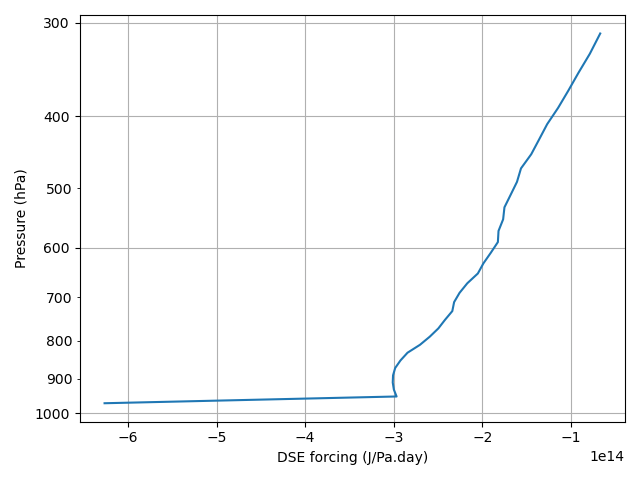

In [10]:
import matplotlib
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
plt.plot(eof1[0,:],p_std[:34]/100)
plt.gca().invert_yaxis()
plt.yscale('log')
plt.yticks([1000,600,400,300])
plt.grid()
plt.xlabel('DSE forcing (J/Pa.day)')
plt.ylabel('Pressure (hPa)')
mticker = matplotlib.ticker.ScalarFormatter()
ax.yaxis.set_minor_formatter(mticker)
ax.yaxis.set_major_formatter(mticker)
# plt.title('eof1')

plt.tight_layout()

# plt.savefig('/home/data/lab_abel/Paper1_var1/EOF_main1.pdf', bbox_inches='tight')

with gzip.open('/home/scratch/Abel_data/eof_totalv4', 'wb') as f:
    pickle.dump(eof1[0,:], f)

In [3]:
import numpy as np
import xarray as xr
from eofs.xarray import Eof

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index= pickle.load(f)
    
p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000
with gzip.open('/home/scratch/Abel_data/rey_datv4', 'rb') as f:
    convfh,convfh1,convfh2,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/eof_totalv4', 'rb') as f:
    eof_prof=pickle.load(f)

convt=(np.array(convfh2))/2000
val=[]

for e in range(len(convt)):
    val_temp=[]
    for i in convt[e]:
        val_temp.append(np.dot(i[:34],eof_prof)/np.dot(eof_prof,eof_prof))
    val.append(val_temp)

print(val)

[[-0.9677385286242807, -0.06574392956347233, 0.2979389286201043, 0.2587675142090634, 0.5461634277306845, -0.533238402697989], [-0.9190522155752231, 0.22346130445859125, 1.8853294405204124, 2.4811597773838754, 2.309451309790843], [0.05807499514055001, 1.1228312843084554, 2.423296677323361, 2.4832329351582914, 1.8665777380389104], [0.5324774910725173, 0.9843379170268637, 1.835400005227389, 1.8625559946519477, 2.8136681827996965], [-3.3921535463860844, -1.8417267895352913, -0.06392235270381805, 1.2245648324299374], [-0.5225387963935206, -0.12376267910669096, -0.18200165734196352, -0.2928925040261396, -0.12112745232279457, 0.0743546357134429, 0.03244159837430036, 1.1278035580590606], [-1.7089054525521132, -0.08448543299514816, 0.8704404018550149, -0.2457109728967711, 0.28491684662958966, 1.9487327222814872], [-1.0498909260457787, -0.1731935872499967, 1.2206102094691913, 2.8079227032149503], [-0.8424154831261422, -0.3182091129178792, 0.7887055396264355, 2.0659407728252273, 3.053266924026521

/tmp/ipykernel_55111/3502561226.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  convt=(np.array(convfh2))/2000


<IPython.core.display.Javascript object>


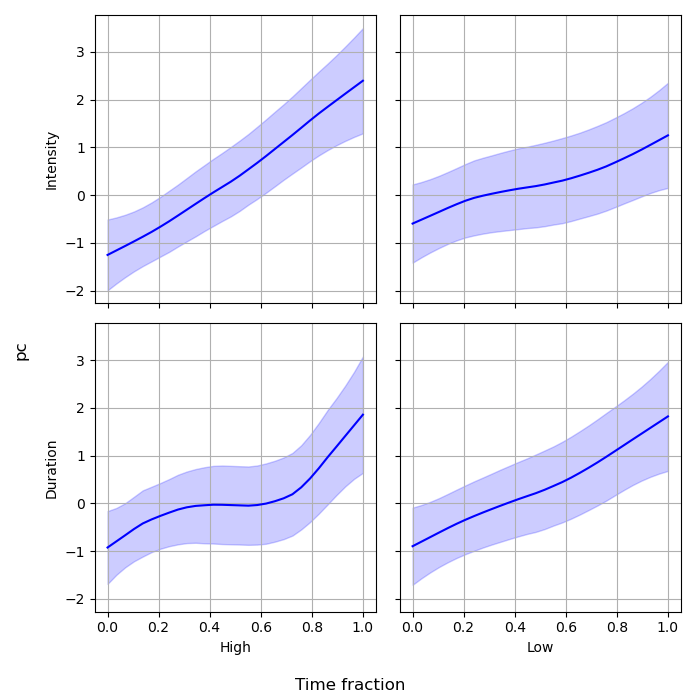

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.set_size_inches(7, 7)

with gzip.open('/home/scratch/Abel_data/heat_indexv4_cut', 'rb') as f:
    heat_index= pickle.load(f)

int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
xx=[]
yy=[]

cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])
        
for i in range(len(val)):
    if (int_list[i]>=cut[4]  and int_list[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(val[i])))
        yy.append(val[i])

xx_arr=np.linspace(0,1,30)
yy_arr=[]

for i in range(len(xx)):
    f = interpolate.interp1d(xx[i], yy[i])
    yy_arr.append(f(xx_arr))

mean_arr=np.mean(yy_arr, axis=0)
std_arr=np.std(yy_arr, axis=0)

ax[0][0].plot(xx_arr,mean_arr, color='blue')
ax[0][0].fill_between(xx_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2,color='blue')
# ax[0][0].set_title('High intensity')
ax[0][0].set_ylabel('Intensity')
ax[0][0].grid()

##############################################################################################################

int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
xx=[]
yy=[]

cut=np.quantile(int_list,[0,0.1,0.45,0.55,0.9,1])
        
for i in range(len(val)):
    if (int_list[i]>=cut[0]  and int_list[i]<=cut[1]):
        xx.append(np.linspace(0,1,len(val[i])))
        yy.append(val[i])

xx_arr=np.linspace(0,1,30)
yy_arr=[]

for i in range(len(xx)):
    f = interpolate.interp1d(xx[i], yy[i])
    yy_arr.append(f(xx_arr))

mean_arr=np.mean(yy_arr, axis=0)
std_arr=np.std(yy_arr, axis=0)

ax[0][1].plot(xx_arr,mean_arr, color='blue')
ax[0][1].fill_between(xx_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2,color='blue')
# ax[0][1].set_title('Low intensity')
ax[0][1].grid()

# ###########################################################################################################

int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
xx=[]
yy=[]

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])
        
for i in range(len(val)):
    if (dur_list[i]>=cut[4]  and int_list[i]<=cut[5]):
        xx.append(np.linspace(0,1,len(val[i])))
        yy.append(val[i])

xx_arr=np.linspace(0,1,30)
yy_arr=[]

for i in range(len(xx)):
    f = interpolate.interp1d(xx[i], yy[i])
    yy_arr.append(f(xx_arr))

mean_arr=np.mean(yy_arr, axis=0)
std_arr=np.std(yy_arr, axis=0)

ax[1][0].plot(xx_arr,mean_arr, color='blue')
ax[1][0].fill_between(xx_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2,color='blue')
# ax[1][0].set_title('High duration')
ax[1][0].set_xlabel('High')
ax[1][0].set_ylabel('Duration')
ax[1][0].grid()

# ############################################################################################################

int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
xx=[]
yy=[]

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])
        
for i in range(len(val)):
    if (dur_list[i]>=cut[0]  and int_list[i]<=cut[1]):
        xx.append(np.linspace(0,1,len(val[i])))
        yy.append(val[i])

xx_arr=np.linspace(0,1,30)
yy_arr=[]

for i in range(len(xx)):
    f = interpolate.interp1d(xx[i], yy[i])
    yy_arr.append(f(xx_arr))

mean_arr=np.mean(yy_arr, axis=0)
std_arr=np.std(yy_arr, axis=0)

ax[1][1].plot(xx_arr,mean_arr, color='blue')
ax[1][1].fill_between(xx_arr, mean_arr-std_arr,mean_arr+std_arr, alpha=0.2,color='blue')
# ax[1][1].set_title('Low duration')
ax[1][1].set_xlabel('Low')
ax[1][1].grid()

fig.supxlabel('Time fraction')
fig.supylabel('pc')

plt.tight_layout()
# plt.savefig('/home/data/lab_abel/Paper1_var1/PC_rey1.pdf', bbox_inches='tight')